# Product Review Analysis

> Inspired by https://youtu.be/8idr1WZ1A7Q

In [3]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

In [4]:
reviews = {
    'A': (10, 0),
    'B': (48, 2),
    'C': (186, 14)
}

## Imperical positive rate and ignore n

- A is best

In [ ]:
# rate rate and n
for product, (positive, negative) in reviews.items():
    n = positive+negative
    p = positive/n
    print(f'Product {product}: {p*100}% from {n} reviews')

Product A: 100.0% from 10 reviews
Product B: 96.0% from 50 reviews
Product C: 93.0% from 200 reviews


## Laplace's Rule of Successions

In [27]:
for product, (positive, negative) in reviews.items():
    new_pos = positive + 1
    new_neg = negative + 1
    new_n = new_pos + new_neg
    laplace = round(new_pos/new_n, 4)
    print(f'Product {product} Laplace Rule of Succession: {laplace*100}%') 

Product A Laplace Rule of Succession: 91.67%
Product B Laplace Rule of Succession: 94.23%
Product C Laplace Rule of Succession: 92.57%


## Beta Distributions

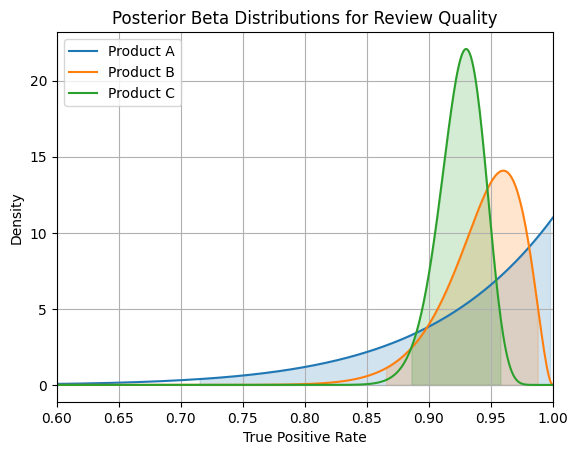

In [18]:
beta_params = {
    product: (positive+1, negative+1)
    for product, (positive, negative)
    in reviews.items()
}
x = np.linspace(0, 1, 1000)
for product, (a, b) in beta_params.items():
    # plot beta distribution
    y = beta.pdf(x, a, b)
    line, = plt.plot(x, y, label=f'Product {product}')
    # plot confidence intervals
    lower, upper = beta.interval(.95, a, b)
    x_fill = np.linspace(lower, upper, 300)
    y_fill = beta.pdf(x_fill, a, b)
    plt.fill_between(x_fill, y_fill, color=line.get_color(), alpha=0.2)


plt.title('Posterior Beta Distributions for Review Quality')
plt.xlabel('True Positive Rate')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.xlim(0.6, 1.0)
plt.show()
